In [20]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.warn('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
%run Preprocessing.py

In [22]:
df = pd.read_csv("austin_weather.csv")

In [23]:
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [24]:
# We will train for Rain first
y_train_thunderstorm = y_train["Thunderstorm"]
y_val_thunderstorm = y_val["Thunderstorm"]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
'C': [0.001, 0.01, 0.1, 1, 10, 100], 
'penalty': ['l1', 'l2', 'elasticnet', 'none'],
'solver': ['newton-cg', 'lbfgs', 'liblinear'],
'class_weight': ['auto'],
'random_state' : [101] , 
'l1_ratio' : [None,0.25,0.5,0.75,1] ,
'max_iter' : [100000] }

logmodel = LogisticRegression()
clf = GridSearchCV(logmodel, params, refit = True, verbose = 0, n_jobs=-1)
clf.fit(X_train, y_train_thunderstorm)

In [27]:
print(classification_report(y_val_thunderstorm, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       165
           1       0.89      0.48      0.63        33

    accuracy                           0.90       198
   macro avg       0.90      0.74      0.79       198
weighted avg       0.90      0.90      0.89       198



<AxesSubplot: >

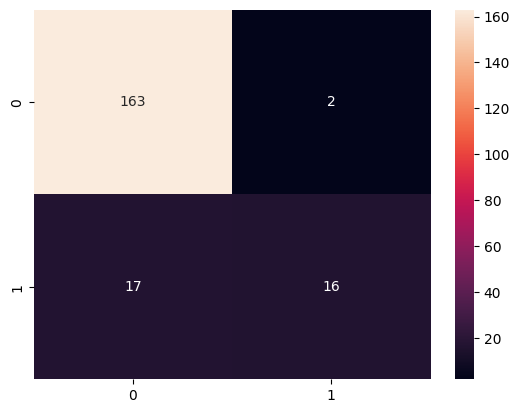

In [29]:
cm = confusion_matrix(y_val_thunderstorm, clf.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d")

In [30]:
clf.best_params_

{'C': 1,
 'class_weight': 'auto',
 'l1_ratio': None,
 'max_iter': 100000,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'newton-cg'}